In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
print(np.__version__)

1.26.3


In [3]:
import pandas as pd
print(pd.__version__)

2.1.4


In [4]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [16]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:\panda\Deep-Learning-Car-Brand\CarBrand_Train'
valid_path = 'D:\panda\Deep-Learning-Car-Brand\CarBrand_Test'

In [17]:
# Import the resnet 50 library as shown below and add preprocessing layer to the front of Resnet 50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [18]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [19]:
# useful for getting number of output classes
folders = glob('D:\panda\Deep-Learning-Car-Brand\CarBrand_Train\*')

In [20]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [21]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [22]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [23]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:\panda\Deep-Learning-Car-Brand\CarBrand_Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [27]:
test_set = test_datagen.flow_from_directory('D:\panda\Deep-Learning-Car-Brand\CarBrand_Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [28]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50


2/2 [==============================] - 11s 5s/step - loss: 6.7578 - accuracy: 0.2344 - val_loss: 7.5801 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 5s 4s/step - loss: 5.4965 - accuracy: 0.3281 - val_loss: 2.7508 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 6s 4s/step - loss: 2.9419 - accuracy: 0.3906 - val_loss: 2.4434 - val_accuracy: 0.3966
Epoch 4/50
2/2 [==============================] - 6s 4s/step - loss: 1.7918 - accuracy: 0.4844 - val_loss: 1.7274 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 6s 4s/step - loss: 1.9690 - accuracy: 0.5312 - val_loss: 1.2902 - val_accuracy: 0.5690
Epoch 6/50
2/2 [==============================] - 6s 4s/step - loss: 0.8886 - accuracy: 0.6406 - val_loss: 2.6718 - val_accuracy: 0.3448
Epoch 7/50
2/2 [==============================] - 6s 4s/step - loss: 1.5206 - accuracy: 0.5312 - val_loss: 1.9424 - val_accuracy: 0.3276
Epoch 8/50
2/2 [======================

In [30]:
r.history

{'loss': [6.757802486419678,
  5.496549129486084,
  2.941920280456543,
  1.7917580604553223,
  1.968969464302063,
  0.8885870575904846,
  1.5206116437911987,
  1.166947841644287,
  1.2094783782958984,
  0.9166207909584045,
  1.0350213050842285,
  0.6975817680358887,
  0.852676272392273,
  0.5985977053642273,
  0.5894176363945007,
  0.5644155144691467,
  0.5138239860534668,
  0.5894290208816528,
  0.3949049115180969,
  0.5267598032951355,
  0.38710933923721313,
  0.42656785249710083,
  0.3569784164428711,
  0.48719239234924316,
  0.3597657382488251,
  0.45514851808547974,
  0.45725637674331665,
  0.29550302028656006,
  0.34180042147636414,
  0.3495531380176544,
  0.30271032452583313,
  0.2963629961013794,
  0.31331098079681396,
  0.29625874757766724,
  0.250684916973114,
  0.26852652430534363,
  0.24608424305915833,
  0.22940194606781006,
  0.22776676714420319,
  0.2525342106819153,
  0.23452888429164886,
  0.19509276747703552,
  0.23783591389656067,
  0.1858881264925003,
  0.2132467478

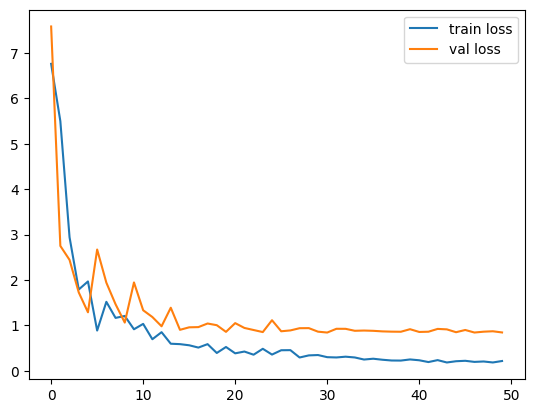

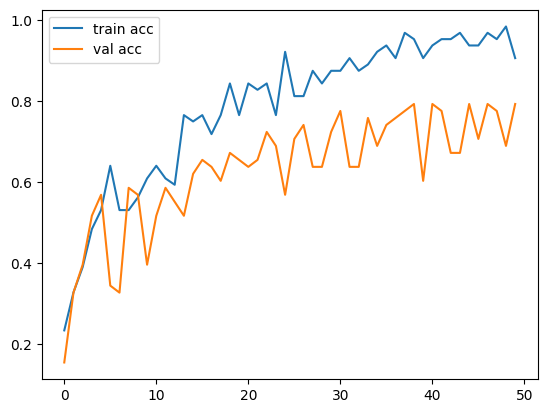

<Figure size 640x480 with 0 Axes>

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\abhin\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Prediction for Test data

In [33]:
y_pred = model.predict(test_set)

2/2 [==============================] - 9s 2s/step


In [34]:
y_pred

array([[1.08585628e-02, 7.73953021e-01, 2.15188414e-01],
       [5.83056186e-04, 9.71983790e-01, 2.74331644e-02],
       [4.11919765e-02, 1.41633362e-01, 8.17174673e-01],
       [7.24198413e-04, 8.72940183e-01, 1.26335636e-01],
       [1.07903078e-01, 2.57205725e-01, 6.34891212e-01],
       [4.57109958e-02, 4.83190417e-01, 4.71098602e-01],
       [4.02837154e-03, 3.98266986e-02, 9.56144989e-01],
       [3.89804016e-03, 9.80327070e-01, 1.57748275e-02],
       [6.07362986e-02, 5.07269502e-01, 4.31994170e-01],
       [6.02340093e-04, 9.94597077e-01, 4.80058230e-03],
       [3.47341527e-03, 9.76770997e-01, 1.97555535e-02],
       [7.43432820e-01, 2.47985199e-01, 8.58200155e-03],
       [4.18511964e-03, 5.05713522e-01, 4.90101278e-01],
       [1.20109860e-02, 8.94766927e-01, 9.32221040e-02],
       [2.30554421e-03, 9.65922177e-01, 3.17723192e-02],
       [1.58839393e-02, 6.03281796e-01, 3.80834311e-01],
       [4.49763089e-02, 5.57836983e-03, 9.49445367e-01],
       [2.71887109e-02, 3.07058

In [35]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [36]:
y_pred

array([1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0,
       1, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1], dtype=int64)

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [40]:
model=load_model('model_resnet50.h5')

In [55]:
img_data

array([[[[-103.00567 , -115.947624, -122.96628 ],
         [-103.00567 , -115.947624, -122.96628 ],
         [-103.00567 , -115.947624, -122.96628 ],
         ...,
         [-103.03312 , -115.96331 , -122.927055],
         [-103.03704 , -115.96723 , -122.930984],
         [-103.04096 , -115.97115 , -122.934906]],

        [[-103.00175 , -115.947624, -122.95451 ],
         [-103.00175 , -115.947624, -122.95451 ],
         [-103.00175 , -115.947624, -122.95451 ],
         ...,
         [-103.03312 , -115.96331 , -122.927055],
         [-103.03704 , -115.96723 , -122.930984],
         [-103.03704 , -115.96723 , -122.930984]],

        [[-103.00175 , -115.947624, -122.95451 ],
         [-103.00175 , -115.947624, -122.95451 ],
         [-103.00175 , -115.947624, -122.95451 ],
         ...,
         [-103.03312 , -115.96331 , -122.927055],
         [-103.03704 , -115.96723 , -122.930984],
         [-103.03704 , -115.96723 , -122.930984]],

        ...,

        [[-103.40959 , -116.241745, -1

In [56]:
img=image.load_img('D:\\panda\\Deep-Learning-Car-Brand\\CarBrand_Test\\lamborghini\\5.jpg',target_size=(224,224))

In [57]:
x=image.img_to_array(img)
x

array([[[182., 212., 238.],
        [182., 212., 238.],
        [182., 212., 238.],
        ...,
        [192., 208., 231.],
        [191., 207., 230.],
        [190., 206., 229.]],

       [[185., 212., 239.],
        [185., 212., 239.],
        [185., 212., 239.],
        ...,
        [192., 208., 231.],
        [191., 207., 230.],
        [191., 207., 230.]],

       [[185., 212., 239.],
        [185., 212., 239.],
        [185., 212., 239.],
        ...,
        [192., 208., 231.],
        [191., 207., 230.],
        [191., 207., 230.]],

       ...,

       [[145., 137., 135.],
        [142., 134., 132.],
        [145., 137., 135.],
        ...,
        [ 95.,  94.,  92.],
        [ 98.,  97.,  95.],
        [118., 117., 115.]],

       [[145., 137., 135.],
        [142., 134., 132.],
        [145., 137., 135.],
        ...,
        [ 95.,  94.,  92.],
        [ 98.,  97.,  95.],
        [118., 117., 115.]],

       [[153., 145., 143.],
        [152., 144., 142.],
        [142., 1

In [58]:
x.shape

(224, 224, 3)

In [59]:
x=x/255

In [60]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [61]:
model.predict(img_data)

1/1 [==============================] - 0s 297ms/step


array([[0.00142613, 0.00408252, 0.99449134]], dtype=float32)

In [62]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 281ms/step


In [64]:
a

array([2], dtype=int64)